## 3. Data Analyst - Run SQL on tables and plot data

In [3]:
from google.cloud import bigquery

client = bigquery.Client()

In [4]:
%%bigquery
SELECT 
    isFraud,
    COUNT(*) as count
FROM `datalake-vol2.datalake_vol2_raw.transaction_data`
GROUP BY isFraud

Downloading: 100%|██████████| 2/2 [00:01<00:00,  1.96rows/s]


,isFraud,count
0,0,6354407
1,1,8213


In [12]:
%%bigquery
SELECT 
    type,
    COUNT(*) as Transactions,
    AVG(amount) as Average_amount
FROM `datalake-vol2.datalake_vol2_raw.transaction_data`
GROUP BY type

Downloading: 100%|██████████| 5/5 [00:00<00:00,  5.48rows/s]


,type,Transactions,Average_amount
0,PAYMENT,2151495,13057.604660
1,TRANSFER,532909,910647.009645
2,CASH_OUT,2237500,176273.964346
3,DEBIT,41432,5483.665314
4,CASH_IN,1399284,168920.242004


In [8]:
%%bigquery
SELECT 
    type, 
    SUM(amount) as total_amount
FROM `datalake-vol2.datalake_vol2_raw.transaction_data`
GROUP BY type

Downloading: 100%|██████████| 5/5 [00:00<00:00,  5.57rows/s]


,type,total_amount
0,PAYMENT,2.809337e+10
1,TRANSFER,4.852920e+11
2,CASH_OUT,3.944130e+11
3,DEBIT,2.271992e+08
4,CASH_IN,2.363674e+11


### Spark to Pandas DataFrame

Enable Apache Arrow to allow faster conversion from Spark DataFrame to Pandas DataFrame.

In [13]:
sql = """
SELECT 
    type,
    COUNT(*) as Transactions,
    AVG(amount) as Average_amount
FROM `datalake-vol2.datalake_vol2_raw.transaction_data`
GROUP BY type
"""

In [14]:
df_jobs = client.query(sql).to_dataframe()

In [15]:
type(df_jobs)

pandas.core.frame.DataFrame

In [16]:
df_jobs.head()

,type,Transactions,Average_amount
0,PAYMENT,2151495,13057.604660
1,TRANSFER,532909,910647.009645
2,CASH_OUT,2237500,176273.964346
3,DEBIT,41432,5483.665314
4,CASH_IN,1399284,168920.242004


### Plot data using Pandas Plotting

In [17]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='type'>

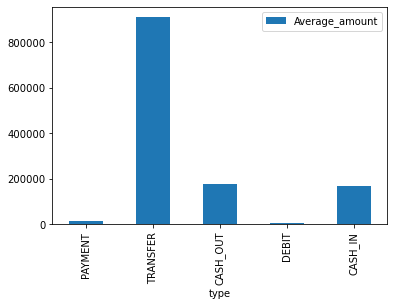

In [19]:
df_jobs.plot.bar(x='type', y='Average_amount', rot=90)

In [20]:
df_jobs.set_index('type', inplace=True)
df_jobs.head()

,Transactions,Average_amount
type,,
PAYMENT,2151495,13057.604660
TRANSFER,532909,910647.009645
CASH_OUT,2237500,176273.964346
DEBIT,41432,5483.665314
CASH_IN,1399284,168920.242004


array([<AxesSubplot:title={'center':'Transactions'}, xlabel='type'>,
       <AxesSubplot:title={'center':'Average_amount'}, xlabel='type'>],
      dtype=object)

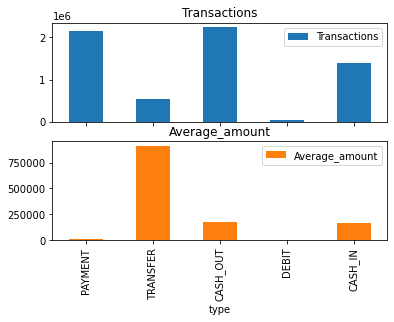

In [21]:
df_jobs.plot.bar(rot=90, subplots=True)